## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
float(df.shape[0])

294478.0

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
users_converted=float(df.query('converted == 1')['user_id'].nunique())

In [7]:
users_converted

35173.0

In [8]:
total_users = float(df.shape[0])

In [9]:
proportion = (users_converted/total_users)

In [10]:
print(format(proportion))

0.1194418598333322


e. The number of times the `new_page` and `treatment` don't match.

In [11]:
df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

The number of times control group receives new_page: 1928

The number of times treatment group receives old_page: 1965

Total number of times= 1928+1965= 3893

f. Do any of the rows have missing values?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [13]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There are 'no' missing values. 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2['user_id'].duplicated()].count()

user_id         1
timestamp       1
group           1
landing_page    1
converted       1
dtype: int64

There is one person who is repeated in df2. I will find the user_id who is being repeated.

In [18]:
print(df2[df2['user_id'].duplicated()])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


The person who has user_id of '773192' is being repeated in df2.

c. What is the row information for the repeat **user_id**? 

In [19]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The row '1899' and '2893' has repeated user_id.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2.drop([1899], inplace=True)

Just to double check!

In [21]:
df2[df2['user_id'].duplicated()].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

The repeated row is cleaned now.

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2[df2['group'] == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2[df2.landing_page == 'new_page'].user_id.count()

145310

In [26]:
df2.shape[0]

290584

In [27]:
df2[df2.landing_page == 'new_page'].user_id.count()/df2.shape[0]

0.50006194422266881

The probability that an individual receives the new page is 0.5001.

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> According to Question1-d, the proportion of users converted was 0.1196 before cleaning the data. After cleaning the data, the probability of individuals in control group is 0.1204 and the probability of individuals in treatment group is 0.1188. The probability of individuals converting are similar nevertheless which group they are in. Therefore, it seems that there is not sufficient evidence that treatment will heighten the conversion probability among individuals. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> Null Hypothesis is H0: when p new - p old <= 0

> Alternative Hypothesis is H1: when p new - p old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [28]:
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()

In [29]:
p_new

0.11880806551510564

I has left above two lines just for my reference in the future. The answer for this question is below.

In [30]:
p_new_null = df['converted'].sum() / df.shape[0]

In [31]:
p_new_null

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [32]:
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()

In [33]:
p_old

0.1203863045004612

I has left above two lines just for my reference in the future. The answer for this question is below.

In [34]:
p_old_null = df['converted'].sum() / df.shape[0]

In [35]:
p_old_null

0.11965919355605512

The value of p_new_null and p_old_null should be same under the null.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [36]:
df2[df2.landing_page == 'new_page'].user_id.count()

145310

In [37]:
n_new = df2[df2.landing_page == 'new_page'].user_id.count()

d. What is $n_{old}$, the number of individuals in the control group?

In [38]:
df2[df2.landing_page == 'old_page'].user_id.count()

145274

In [39]:
n_old = df2[df2.landing_page == 'old_page'].user_id.count()

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [40]:
new_page_converted = np.random.binomial(1, p_new_null, n_new)

In [41]:
new_page_converted.mean()

0.11959947698024913

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [42]:
old_page_converted = np.random.binomial(1, p_old_null, n_old)

In [43]:
old_page_converted.mean()

0.11920921844239162

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [44]:
new_page_converted.sum() / n_new - old_page_converted.sum() / n_old

0.00039025853785751297

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [45]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old_null, n_old)
    old_page_converted_m = old_page_converted.mean()
    new_page_converted = np.random.binomial(1, p_new_null, n_new)
    new_page_converted_m = new_page_converted.mean()
    p_diffs.append(old_page_converted_m - new_page_converted_m)

In [46]:
df.shape[0]

294478

In [47]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [48]:
p_diffs = np.array(p_diffs)

In [49]:
p_diffs.mean()

1.8123566192584918e-05

In [50]:
p_diffs.std()

0.0012079241238565166

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

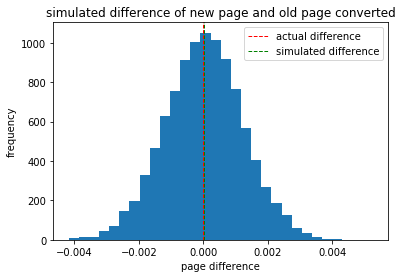

In [51]:
plt.hist(p_diffs, bins=30)
plt.title('simulated difference of new page and old page converted')
plt.xlabel('page difference')
plt.ylabel('frequency')
plt.axvline(x=(p_new_null-p_old_null), color='r', linestyle='dashed', linewidth=1, label="actual difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [52]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

In [53]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

In [54]:
df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()

-0.0015782389853555567

In [55]:
observed_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()

In [56]:
p_value = (p_diffs > observed_diff).mean()

In [57]:
p_value

0.90539999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>In the j part, I have calculated the probability of p_diff and observed_diff. And I have found out that the probability of p_diff is greater than observed_diff. The p_value is 0.902. The p_value is called p-value in scientific term. We have found that p-value is 90.8% which refers that 90.8% of the differences of probability. Because the results are above the .05 null hypothesis, the results are not significant. Therefore, we accept the null hypothesis. In other words, we don’t see significant difference converting into new page. 

*p-value: “the level of marginal significance within a statistical hypothesis test representing the probability of the occurrence of a given event” (reference: https://www.investopedia.com/terms/p/p-value.asp)


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [59]:
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [61]:
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The z-score is 1.311 and the p-value is 0.0949. We fail to reject the null hypothesis. And since just like before, the p-value is larger than 0.05, we fail to reject the null hypothesis again. Therefore, this leads to same conclusion which were shown in j and k section above. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The logistic regression method will be suitable for this caes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [174]:
df2['intercept'] = 1

In [175]:
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])

In [176]:
df2.drop(['drop'], axis=1, inplace=True)

In [177]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


The intecept axis is included. You compare this table with the table in Question 1 section a.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [178]:
model_predict= sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])

In [179]:
result=model_predict.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [180]:
model_predict= sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])
result=model_predict.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        06:52:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>The p-value for ab_page is 0.190. Comparing this value to the value which I calculated using z-test, this is lower. The p-value using the z-test came out to be 0.949. The value of p-value has changed because we have added the ‘intercept variable’.
In the part II, the hypothesis was set to test in only one direction (one-tailed test). I just wanted to know whether the new page higher the conversion rate compared to old page. While in the part part III, the hypothesis was set to test two-tailed test. In this case, we just want to know whether the independent/ explanatory variable has any effects. These are the reasons why the results came out different. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>There will be both advantages and disadvantages for adding additional features on my model. The advantages will be that it will make the model more predictive which will lead us to make more accurate prediction. The disadvantages will be that it will make the model more complexed. And there will be possibilities that the co-relationship between the dependent variables might occur. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [181]:
countries_df = pd.read_csv('./countries.csv')

In [182]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [183]:
df3 = df2.merge(countries_df,on='user_id', how='inner')

In [184]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [185]:
df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [186]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(['country', 'CA'], axis=1)

In [187]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


In [188]:
model_predict_countries= sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])

In [189]:
results_countries = model_predict_countries.fit()
results_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        06:54:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

>For my analysis, Canada was used as baseline and was not included in my regression model. Interpreting the results, I could say US users has 4% more conversion and UK users has 5.1% more conversion (comparing it with Canada users) while holding other variables constant. And interpreting the ab_page variable, for every unit in new_page, it is likely that the conversion will be decreased by 0.15% while holding other variables constant. None of the variables are significant and cannot reject the null hypothesis. Therefore, I could say new page is not significantly would raise the conversion rate compared to old page. 


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [196]:
df3['page_US'] = df3['ab_page'] * df3['US']

In [197]:
df3['page_UK'] = df3['ab_page'] * df3['UK']

In [199]:
model_predict_last = sm.Logit(df3.converted,df3[['intercept','page_US','page_UK','US','UK','ab_page']])

In [200]:
model_predict_last = sm.Logit(df3.converted,df3[['intercept','page_US','page_UK','US','UK','ab_page']])
model_predict_last.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        07:01:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
page_US        0.0469      0.054      0.872      0.383      -0.059       0.152
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

Observing the p-values among the variables, the p-value of all the variables except 'intercept' are above 0.05. This referes that they no significant effect on conversion rate. 

In conclusion, we cannot reject the null hypothesis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])